<a href="https://colab.research.google.com/github/693080593/research/blob/master/3_Sets_Polynomial(Tricomponent)_Modified_Dataset_x3_121920_%5B3%5D_cHB_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080620 Polynomial Cheng 2021 Modified (Tricomponent) x3 121920.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]

Bio-crude dataset has 675 data points with 32 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,ProHemi,ProCarb,ProAsh,CellCarb,CellLig,HemiCarb,HemiLig,CarbLig,LigAsh,ProCellCarb,ProCellLig,ProCellAsh,ProHemiLig,ProCarbLig,ProCarbAsh,ProLigAsh,CellCarbLig,CellLigAsh,HemiCarbAsh,LipProLig,LipProAsh,LipCellLig,LipCellAsh,LipCarbLig,Bio-crude Oil Yield
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,85.50
30,30.9,27.3,0.0,0.0,32.7,0.0,9.1,0.0,8.9271,2.4843,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.812366,0.0,0.0,0.0,0.0,0.0,0.767649,0.0,0.0,0.0,41.00
60,13.3,25.5,0.0,0.0,38.7,0.0,0.0,0.0,9.8685,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,27.10
90,6.5,65.2,0.0,0.0,20.7,0.0,8.0,0.0,13.4964,5.2160,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.079712,0.0,0.0,0.0,0.0,0.0,0.339040,0.0,0.0,0.0,38.00
120,1.9,23.4,66.4,0.0,8.0,0.0,0.0,0.0,1.8720,0.0000,5.312,0.0000,0.0,0.0000,0.0,0.0,1.243008,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,23.60
150,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.30
180,0.0,0.0,39.2,35.1,0.0,20.2,0.0,0.0,0.0000,0.0000,0.000,7.9184,0.0,7.0902,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,26.98
210,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0000,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,6.50


In [ ]:
#import random
#index = [i for i in range(len(data))] 
#random.shuffle(index)
#data = data.loc[index] 
#data = data.drop('random', axis = 1)
#data.shape
#data[:240:30]

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
95,5.890,48.500,0.001,0.001,10.800,0.001,8.200,29.200
10,51.400,21.800,0.001,0.001,7.400,0.001,0.001,60.600
223,0.001,0.001,0.001,0.001,0.001,100.000,0.001,3.930
181,0.001,0.001,46.470,33.350,0.001,18.960,1.220,16.500
105,4.900,22.650,15.650,21.550,0.001,12.800,19.550,15.527
123,1.700,27.200,14.400,3.500,0.001,5.700,47.500,26.179
15,50.000,0.001,0.001,0.001,50.000,0.001,0.001,54.100
184,0.001,0.001,43.600,27.600,0.001,28.800,0.001,16.700


In [ ]:
#Oil_Yields = data['Bio-crude Oil Yield']
#Features = data.drop('Bio-crude Oil Yield', axis = 1)
#print(Oil_Yields)
#print(Features)

95     29.200
163    12.700
85     31.300
52     26.145
93     16.438
        ...  
12     59.400
145    37.500
202     7.890
47     36.000
74     24.740
Name: Bio-crude Oil Yield, Length: 225, dtype: float64
      Lipid  Protein  Cellulose  ...  Lignin     Ash    random
95    5.890   48.500      0.001  ...   0.001   8.200  0.500668
163   0.001   50.000      0.001  ...   0.001   0.001  0.468067
85    7.950   43.625      6.488  ...   8.643   4.608  0.500783
52   14.800   16.800     18.200  ...  34.600   4.300  0.149178
93    6.048   32.508      0.001  ...   0.001  24.400  0.820278
..      ...      ...        ...  ...     ...     ...       ...
12   50.000   50.000      0.001  ...   0.001   0.001  0.329563
145   0.100   35.750     14.600  ...  14.100  12.300  0.664647
202   0.001    0.001     56.045  ...  22.197   7.820  0.082737
47   15.650   25.175      6.450  ...   4.125  24.100  0.496196
74   10.000   15.000     27.000  ...  25.000   0.001  0.861956

[225 rows x 8 columns]


In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [3]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

#import random
#index = [i for i in range(len(data))] 
#random.shuffle(index)
#data = data.loc[index] 
#Oil_Yields = data['Bio-crude Oil Yield']
#Features = data.drop('Bio-crude Oil Yield', axis = 1)
#Features = Features.drop('random', axis = 1)

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

# Predict validation set
y_valid_predict = model.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("")
print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 1.7181120584657303
Standard deviation of MAE of training set 0.08689821725806583
Mean value of MAE of test set 2.6392262874688512
Standard deviation of MAE of test set 0.49775339856486367

Mean value of RMSE of training set 3.4235589815710386
Standard deviation of RMSE of training set 0.15054089307847054
Mean value of RMSE of test set 4.402094095441072
Standard deviation of RMSE of test set 0.7885022408596206

Mean value of R2 of training set 0.956473458527987
Standard deviation of R2 of training set 0.004654035245027363
Mean value of R2 of test set 0.9230742855413829
Standard deviation of R2 of test set 0.026913257775123864

Mean value of MRE of training set 0.0633347705438305
Standard deviation of MRE of training set 0.0033279095554855746
Mean value of MRE of test set 0.097004580738308
Standard deviation of MRE of test set 0.014715916232451573

Optimal model has MAE of valid set: 2.4327420200123795
Optimal model has RMSE of valid set: 4.1227582603650

Text(0.5, 1.0, 'y_pred vs. y_true')

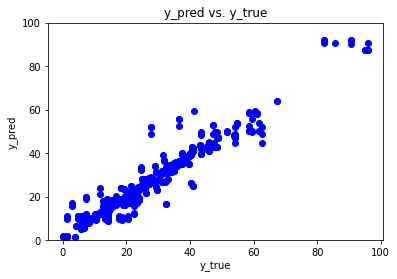

In [4]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

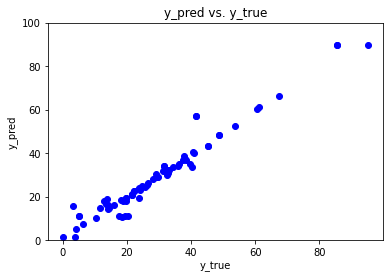

In [5]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 201, 10)

for i in range(10, 201, 10):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 74)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':i,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [ ]:
# max_depth 参数的最佳取值(1, 16, 2)

for i in range(1, 21, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 74)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':120,'max_depth':i,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [ ]:
# min_samples_leaf 参数的最佳取值(1, 42, 20)

for i in range(1, 42, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 74)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':120,'max_depth':17,'min_samples_leaf':i,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [ ]:
# min_samples_split 参数的最佳取值(2, 43, 20)

for i in range(2, 44, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 74)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':120,'max_depth':17,'min_samples_leaf':1,'min_samples_split':i,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [ ]:
# max_features 参数的最佳取值(1, 13, 1)

for i in range(1, 14, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 74)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':120,'max_depth':17,'min_samples_leaf':1,'min_samples_split':2,'max_features':i}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [6]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    params = {'n_estimators':90,'max_depth':15,'min_samples_leaf':1,'min_samples_split':2,'max_features':16}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

# Predict validation set
y_valid_predict = model.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("")
print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

Mean value of MAE of training set 1.7163453011999557
Standard deviation of MAE of training set 0.06991186035383229
Mean value of MAE of test set 2.6124956388041296
Standard deviation of MAE of test set 0.511831175913737

Mean value of RMSE of training set 3.4137108695170597
Standard deviation of RMSE of training set 0.14492154904528548
Mean value of RMSE of test set 4.3608178122058465
Standard deviation of RMSE of test set 0.8137586854351561

Mean value of R2 of training set 0.9567200038534978
Standard deviation of R2 of training set 0.0045907818733287985
Mean value of R2 of test set 0.9246953990045463
Standard deviation of R2 of test set 0.02561698665325216

Mean value of MRE of training set 0.06326748363572055
Standard deviation of MRE of training set 0.002673333389104061
Mean value of MRE of test set 0.09601663103397232
Standard deviation of MRE of test set 0.015337019229032366

Optimal model has MAE of valid set: 2.415407826137542
Optimal model has RMSE of valid set: 4.057115824440

Text(0.5, 1.0, 'y_pred vs. y_true')

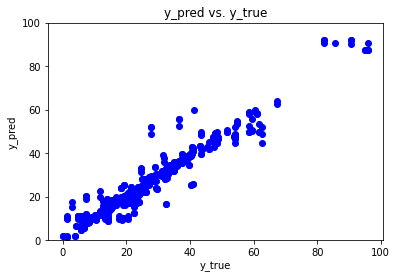

In [7]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_RFR_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

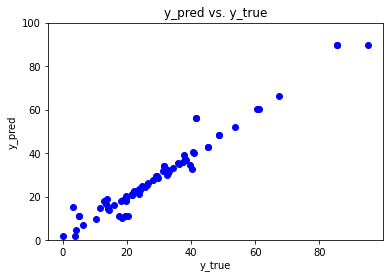

In [8]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

 1) Lipid                          0.632312
 2) Protein                        0.067093
 3) ProCarb                        0.051123
 4) Lignin                         0.045897
 5) Carbohydrate                   0.035203
 6) Cellulose                      0.030638
 7) Ash                            0.026930
 8) ProCarbAsh                     0.014410
 9) Hemicellulose                  0.013681
10) ProAsh                         0.012972
11) CellLig                        0.012020
12) HemiLig                        0.010188
13) LipProAsh                      0.008896
14) CellLigAsh                     0.006869
15) ProCellCarb                    0.003655
16) LipCarbLig                     0.003653
17) LigAsh                         0.003448
18) CellCarb                       0.002490
19) ProCellLig                     0.002482
20) ProHemi                        0.002354
21) LipProLig                      0.001865
22) LipCellLig                     0.001673
23) ProCellAsh                  

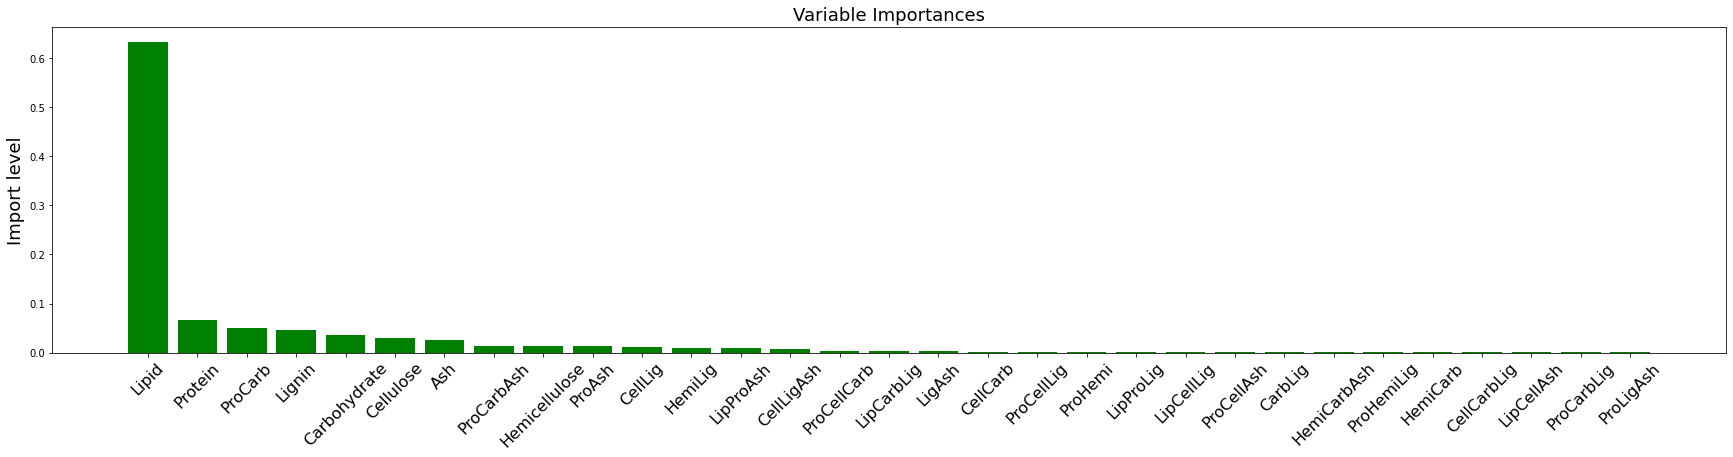

In [9]:
import matplotlib.pyplot as plt

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash','ProHemi','ProCarb','ProAsh','CellCarb','CellLig','HemiCarb','HemiLig','CarbLig','LigAsh',
                    'ProCellCarb','ProCellLig','ProCellAsh','ProHemiLig','ProCarbLig','ProCarbAsh','ProLigAsh','CellCarbLig','CellLigAsh','HemiCarbAsh','LipProLig',
                    'LipProAsh','LipCellLig','LipCellAsh','LipCarbLig']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(30, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=16)
plt.show()

fig.savefig('Biocrude Yield RF Variable Importances.png')